In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.centroids = None

    @staticmethod
    def distance(data_point, centroids):
        data_point = np.array(data_point, dtype=np.float64)
        centroids = np.array(centroids, dtype=np.float64)
        return np.sqrt(((centroids - data_point) ** 2).sum(axis=1))

    def fit(self, X, max_iterations=200):
        X = np.array(X, dtype=np.float64)
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))
        
        for _ in range(max_iterations):
            distances = np.array([self.distance(data_point, self.centroids) for data_point in X])
            y = np.argmin(distances, axis=1)
            new_centroids = np.array([
                X[y == i].mean(axis=0) if len(X[y == i]) > 0 else self.centroids[i]
                for i in range(self.k)
            ])
            if np.max(np.abs(self.centroids - new_centroids)) < 0.0001:
                break
            self.centroids = new_centroids
        
        return y
    
    def inertia(self, X):
        distances = np.array([self.distance(data_point, self.centroids) for data_point in X])
        return np.sum(np.min(distances, axis=1))

In [30]:
df = pd.read_csv("spotify.csv", usecols=['track_popularity', 'danceability', 'energy', 'loudness', 'mode'])
df.head()

,track_popularity,danceability,energy,loudness,mode
0,66,0.748,0.916,-2.634,1
1,67,0.726,0.815,-4.969,1
2,70,0.675,0.931,-3.432,0
3,60,0.718,0.930,-3.778,1
4,69,0.650,0.833,-4.672,1


C:\Users\mkaif\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


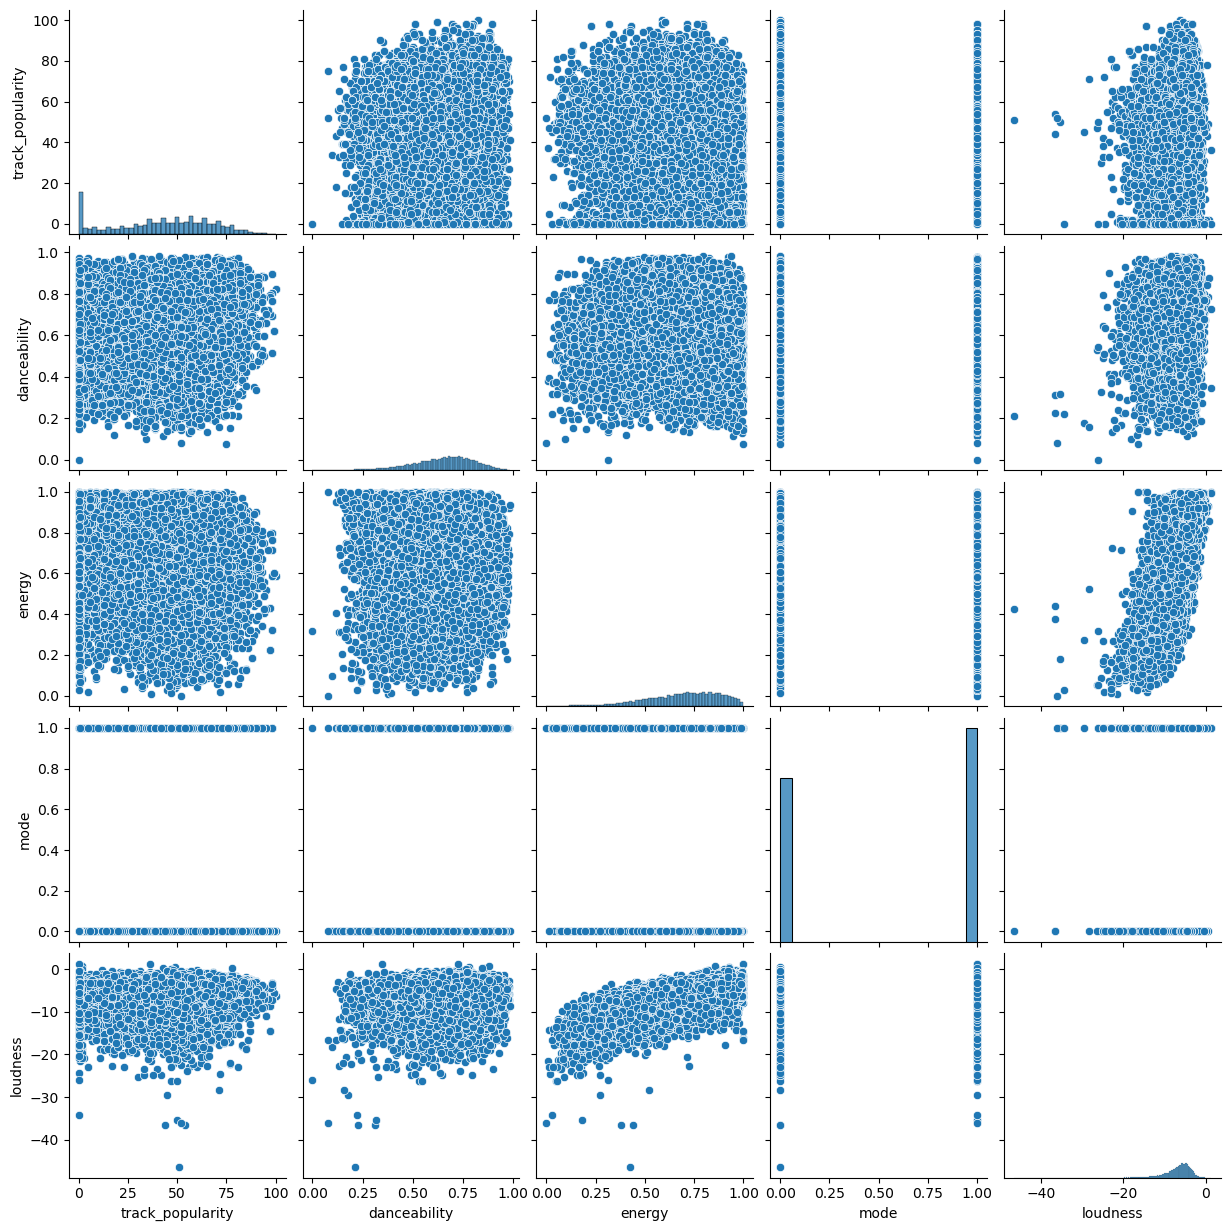

In [31]:
import seaborn as sns

sns.pairplot(df[['track_popularity', 'danceability', 'energy', 'mode', 'loudness']])
plt.show()

In [32]:
X = df.to_numpy()

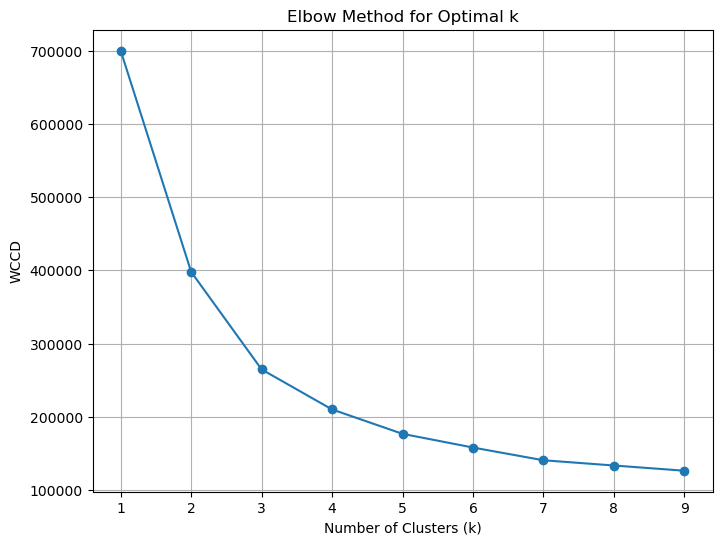

In [33]:
k_range = range(1, 10)

# List to store the sum of squared distances (inertia) for each k
inertia = []

# Compute KMeans for each k in the range
for k in k_range:
    kmeans = KMeans(k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia(X))

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
